In [1553]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#importing a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline

welltory = pd.read_csv("hrv_measurements.csv")



In [1438]:
for col in welltory.columns:
    print(col)

user_code
rr_code
measurement_datetime
time_of_day
bpm
meanrr
mxdmn
sdnn
rmssd
pnn50
mode
amo
lf
hf
vlf
lfhf
total_power
how_feel
how_mood
how_sleep
tags
rr_data


In [1439]:
welltory.measurement_datetime[1]
welltory.dtypes


user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object

In [1440]:
welltory["measurement_datetime"]


0       2020-04-21 21:23:08
1       2020-04-26 11:19:25
2       2020-04-24 10:08:25
3       2020-04-26 20:42:40
4       2020-04-29 22:33:33
5       2020-04-22 09:13:10
6       2020-05-05 09:22:41
7       2020-05-03 23:24:20
8       2020-05-12 09:05:54
9       2020-05-01 16:37:41
10      2020-05-04 07:07:27
11      2020-05-04 20:12:05
12      2020-04-13 19:17:50
13      2020-01-30 17:55:54
14      2020-05-11 09:33:06
15      2020-04-26 17:43:13
16      2020-05-03 18:40:55
17      2020-04-30 09:16:38
18      2020-05-11 20:15:55
19      2020-04-20 20:34:35
20      2020-05-02 05:57:56
21      2020-05-08 20:43:15
22      2020-05-02 21:12:05
23      2020-04-17 15:17:08
24      2020-04-25 14:12:02
25      2020-04-26 08:26:03
26      2020-04-28 18:28:47
27      2020-04-22 18:02:30
28      2020-05-04 09:26:18
29      2020-05-03 21:25:34
               ...         
1918    2020-05-01 21:52:44
1919    2020-04-25 08:34:47
1920    2020-04-26 22:31:51
1921    2020-04-30 17:55:37
1922    2020-05-01 0

In [1441]:
welltory["measurement_DT"] = pd.to_datetime(welltory["measurement_datetime"]) #converting the object to a datetime object, making a new variable called measurement_DT
welltory.dtypes

user_code                       object
rr_code                         object
measurement_datetime            object
time_of_day                     object
bpm                              int64
meanrr                         float64
mxdmn                          float64
sdnn                           float64
rmssd                          float64
pnn50                          float64
mode                           float64
amo                            float64
lf                             float64
hf                             float64
vlf                            float64
lfhf                           float64
total_power                    float64
how_feel                         int64
how_mood                         int64
how_sleep                      float64
tags                            object
rr_data                         object
measurement_DT          datetime64[ns]
dtype: object

In [1442]:
welltory["measurement_date"] = welltory["measurement_DT"].dt.normalize() #removing the timestamp and just keeping the date
welltory['measurement_date'] = welltory['measurement_date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the date

In [1443]:
welltory.sort_values(by = "measurement_date")
welltory.isnull().any() #checking for missing data

user_code               False
rr_code                 False
measurement_datetime    False
time_of_day             False
bpm                     False
meanrr                  False
mxdmn                   False
sdnn                    False
rmssd                   False
pnn50                   False
mode                    False
amo                     False
lf                      False
hf                      False
vlf                     False
lfhf                    False
total_power             False
how_feel                False
how_mood                False
how_sleep                True
tags                     True
rr_data                 False
measurement_DT          False
measurement_date        False
dtype: bool

In [1444]:
#taking the natural log of rmssd, so that data are easier to interpret
welltory['lnrmssd'] = np.log(welltory['rmssd'])

#sns.replot(x = rmssd)

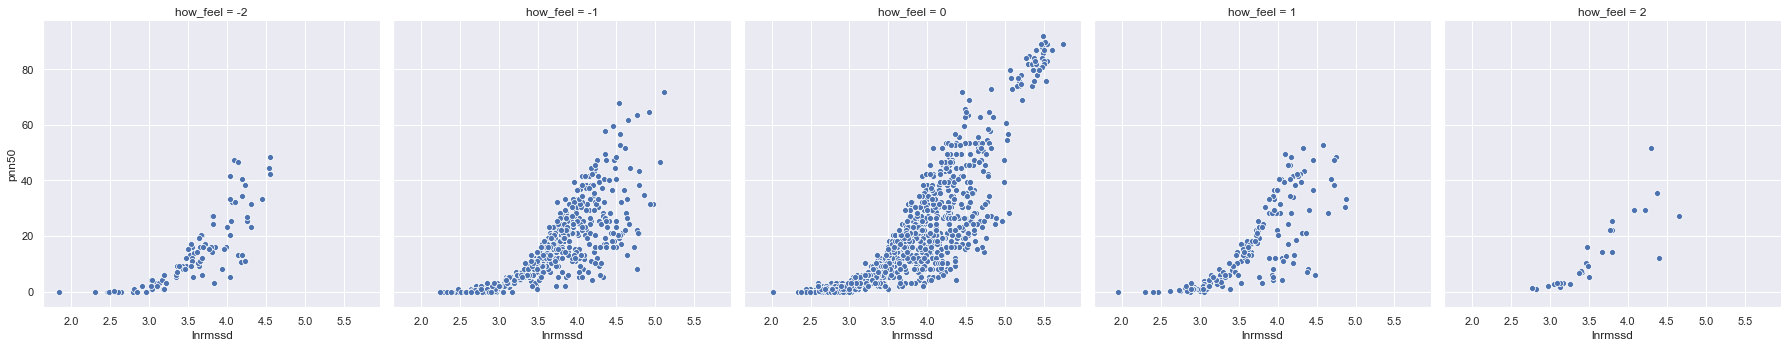

In [1445]:
sns.set()
sns.relplot(x = "lnrmssd", y = "pnn50", col = "how_feel", data = welltory); #semi colon to get rid of the text on top of graph

In [1446]:
hrv_ts = welltory.groupby(['measurement_date', 'user_code'],
                         as_index = False)['rmssd', 'pnn50', 'bpm'].mean() #making a new data frame of aggregated HRV meeasurements

In [1447]:
hrv_ts.isnull().any() #checking for missing values

measurement_date    False
user_code           False
rmssd               False
pnn50               False
bpm                 False
dtype: bool

In [1448]:
wearables = pd.read_csv("wearables.csv")
wearables.columns
wearables.isnull().any() #checking missings

user_code                          False
day                                False
resting_pulse                       True
pulse_average                       True
pulse_min                           True
pulse_max                           True
average_spo2_value                  True
body_temperature_avg                True
stand_hours_total                   True
steps_count                         True
distance                            True
steps_speed                         True
total_number_of_flights_climbed     True
active_calories_burned              True
basal_calories_burned              False
total_calories_burned              False
average_headphone_exposure          True
average_environment_exposure        True
dtype: bool

In [1449]:
wearables["measurement_date"] = pd.to_datetime(wearables["day"]) #converting the object to a datetime object, making a new variable called measurement_date

In [1450]:
wearables['measurement_date'] = wearables['measurement_date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the dat

In [1451]:
wearables_ts = wearables.groupby(['measurement_date','user_code'], #preserves the missing values for later imputation
                                 as_index = False).agg({'steps_count': lambda x: x.sum(skipna = False),
                                                       'active_calories_burned': lambda x: x.sum(skipna = False),
                                                       'distance': lambda x: x.sum(skipna = False), 
                                                       'steps_speed': lambda x: x.sum(skipna = False),
                                                       'body_temperature_avg': lambda x: x.sum(skipna = False),
                                                       'pulse_average': lambda x: x.sum(skipna = False),
                                                       'stand_hours_total': lambda x: x.sum(skipna = False),
                                                       'total_number_of_flights_climbed': lambda x: x.sum(skipna = False),
                                                       'pulse_min': lambda x: x.sum(skipna = False), 
                                                       'pulse_max': lambda x: x.sum(skipna = False),
                                                       'average_spo2_value': lambda x: x.sum(skipna = False)})

In [1452]:
wearables_ts #dataframe with missing values preserved

,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,total_number_of_flights_climbed,pulse_min,pulse_max,average_spo2_value
0,01-01-2020,0d297d2410,4153.0,104.0,3060.0,32.98,NaN,85.0,3.0,8.0,47.0,118.0,NaN
1,01-01-2020,35c7355282,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,57.0,128.0,NaN
2,01-01-2020,4985083f4d,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,60.0,129.0,NaN
3,01-01-2020,5d200bd1c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN
4,01-01-2020,6be5033971,NaN,NaN,NaN,NaN,NaN,62.0,NaN,28.0,46.0,98.0,NaN
5,01-01-2020,a1c2e6b2eb,10025.0,1909.0,5417.0,9.84,NaN,65.0,NaN,NaN,53.0,94.0,NaN
6,01-01-2020,cdfbcad405,1081.0,21.0,875.0,24.18,NaN,75.0,5.0,NaN,44.0,97.0,NaN
7,01-01-2020,ebf2c3cb63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01-01-2020,fcf3ea75b0,13379.0,300.0,8982.0,48.32,NaN,80.0,NaN,17.0,58.0,118.0,NaN
9,01-02-2020,0d297d2410,18523.0,483.0,12553.0,57.71,NaN,75.0,12.0,16.0,48.0,115.0,NaN


In [1453]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [1454]:
participants = pd.read_csv('participants.csv')

In [1455]:
participants.isnull().any() #checking for missing values

user_code         False
gender            False
age_range         False
city               True
country            True
height             True
weight            False
symptoms_onset     True
dtype: bool

In [1456]:
participants_ts = participants[["user_code","gender","age_range","height","weight"]]

In [1457]:
heart_rate = pd.read_csv("heart_rate.csv")

In [1458]:
heart_rate.isnull().any() #checking to see if there are any missings
#heart_rate.dtypes

user_code     False
datetime      False
heart_rate    False
is_resting    False
dtype: bool

In [1459]:
heart_rate
heart_rate['datetime_ob'] = pd.to_datetime(heart_rate['datetime']) #converting the object to a datetime object, making a new variable called measurement_DT
heart_rate['date'] = heart_rate["datetime_ob"].dt.normalize() #removing the timestamp and just keeping the date
heart_rate['measurement_date'] = heart_rate['date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the date

heart_rate_ts = heart_rate.groupby(['measurement_date', 'user_code'],
                         as_index = False)['is_resting', 'heart_rate'].mean() #making a new data frame of aggregated measures

heart_rate_ts

,measurement_date,user_code,is_resting,heart_rate
0,01-01-2020,0d297d2410,0.012658,82.683544
1,01-01-2020,35c7355282,0.000000,71.714286
2,01-01-2020,4985083f4d,0.007519,85.225564
3,01-01-2020,6be5033971,0.005291,61.608466
4,01-01-2020,a1c2e6b2eb,0.000000,67.168919
5,01-01-2020,cdfbcad405,0.000000,72.000000
6,01-01-2020,fcf3ea75b0,0.009740,79.314935
7,01-02-2020,0d297d2410,0.006579,75.164474
8,01-02-2020,35c7355282,0.000000,70.338983
9,01-02-2020,4985083f4d,0.005814,75.819767


In [1460]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [1461]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [1462]:
#taking the natural log of rmssd, so that data are easier to interpret
#welltory_merge['lnsteps_speed'] = np.log(welltory_merge['steps_speed'])


In [1463]:
participants

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,01bad5a519,m,45-54,St Petersburg,Russia,178.00,91.000,4/5/2020
2,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,4/5/2020
3,02a2b827c9,m,25-34,NaN,Russia,177.00,87.100,3/27/2020
4,02b528c2fe,f,35-44,Moscow,Russia,178.00,64.000,NaN
5,05bcfae0a4,m,35-44,Atlanta,United States,NaN,75.977,3/25/2020
6,0bdfbddb2b,f,18-24,Teren'ga,Russia,159.00,73.500,4/1/2020
7,0d297d2410,m,35-44,Moscow,Russia,173.00,86.000,NaN
8,0f2d7af30c,f,25-34,Bila Tserkva,Ukraine,164.00,65.100,3/10/2020
9,107b4ef739,m,55-64,Cleveland,United States,180.34,91.399,NaN


In [1464]:
dataframes = [wearables_ts, hrv_ts, participants_ts, heart_rate_ts]

def num_missing(dataframes): #parameter a list of pandas data frame objects
    '''a function that returns the number of missing values in a list of dataframe objects'''
    
    for df in dataframes:
        df_ts_missing_bol = df.isna()
        df_ts_missing = df_ts_missing_bol.sum()
        print(df_ts_missing) #looking at the amount of missing data
    

In [1465]:
num_missing(dataframes) #returns the number of missing values in each of my timeseries dataframes

measurement_date                      0
user_code                             0
steps_count                         762
active_calories_burned             1343
distance                            846
steps_speed                        1151
body_temperature_avg               2037
pulse_average                       622
stand_hours_total                  1745
total_number_of_flights_climbed    1241
pulse_min                           622
pulse_max                           622
average_spo2_value                 2064
dtype: int64
measurement_date    0
user_code           0
rmssd               0
pnn50               0
bpm                 0
dtype: int64
user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64
measurement_date    0
user_code           0
is_resting          0
heart_rate          0
dtype: int64


In [1466]:
## imputing missing values
wearables_ts.dtypes

measurement_date                    object
user_code                           object
steps_count                        float64
active_calories_burned             float64
distance                           float64
steps_speed                        float64
body_temperature_avg               float64
pulse_average                      float64
stand_hours_total                  float64
total_number_of_flights_climbed    float64
pulse_min                          float64
pulse_max                          float64
average_spo2_value                 float64
dtype: object

In [1467]:
wearables_ts

,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,total_number_of_flights_climbed,pulse_min,pulse_max,average_spo2_value
0,01-01-2020,0d297d2410,4153.0,104.0,3060.0,32.98,NaN,85.0,3.0,8.0,47.0,118.0,NaN
1,01-01-2020,35c7355282,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,57.0,128.0,NaN
2,01-01-2020,4985083f4d,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,60.0,129.0,NaN
3,01-01-2020,5d200bd1c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN
4,01-01-2020,6be5033971,NaN,NaN,NaN,NaN,NaN,62.0,NaN,28.0,46.0,98.0,NaN
5,01-01-2020,a1c2e6b2eb,10025.0,1909.0,5417.0,9.84,NaN,65.0,NaN,NaN,53.0,94.0,NaN
6,01-01-2020,cdfbcad405,1081.0,21.0,875.0,24.18,NaN,75.0,5.0,NaN,44.0,97.0,NaN
7,01-01-2020,ebf2c3cb63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01-01-2020,fcf3ea75b0,13379.0,300.0,8982.0,48.32,NaN,80.0,NaN,17.0,58.0,118.0,NaN
9,01-02-2020,0d297d2410,18523.0,483.0,12553.0,57.71,NaN,75.0,12.0,16.0,48.0,115.0,NaN


In [1468]:
wearables_ts.measurement_date = pd.to_datetime(wearables_ts.measurement_date, format = '%m-%d-%Y')

In [1469]:
type(wearables_ts.measurement_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [1470]:
wearables_ts.set_index(['measurement_date','user_code'], inplace=True) #setting the index to the measurement date & user code

In [1471]:
wearables_ts

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282          NaN                     NaN       NaN   
                 4985083f4d          NaN                     NaN       NaN   
                 5d200bd1c6          NaN                     NaN       NaN   
                 6be5033971          NaN                     NaN       NaN   
                 a1c2e6b2eb      10025.0                  1909.0    5417.0   
                 cdfbcad405       1081.0                    21.0     875.0   
                 ebf2c3cb63          NaN                     NaN       NaN   
                 fcf3ea75b0      13379.0                   300.0    8982.0   
2020-01-02       0d297d2410      18523.0                   483.0   12553.0   
                 35c7355282          NaN                     NaN       NaN   
                 4985083f4d          NaN                     NaN       NaN   
                 5d200bd1c6          NaN                     NaN       NaN   
                 6be5033971          NaN                     NaN       NaN   
                 a1c2e6b2eb       6317.0                  2367.0   13873.0   
                 cdfbcad405       8641.0                   105.0    5668.0   
                 ebf2c3cb63          NaN                     NaN       NaN   
                 fcf3ea75b0       8709.0                   241.0    5726.0   
2020-01-03       0d297d2410       7466.0                   262.0    5318.0   
                 35c7355282          NaN                     NaN       NaN   
                 4985083f4d          NaN                     NaN       NaN   
                 5d200bd1c6          NaN                     NaN       NaN   
                 6be5033971          NaN                     NaN       NaN   
                 a1c2e6b2eb       3780.0                  1605.0    2092.0   
                 cdfbcad405       1730.0                    32.0    1429.0   
                 ebf2c3cb63          NaN                     NaN       NaN   
                 fcf3ea75b0       8495.0                   229.0    5723.0   
2020-01-04       0d297d2410       5811.0                   140.0       NaN   
                 35c7355282          NaN                     NaN       NaN   
                 5d200bd1c6          NaN                     NaN       NaN   
...                                  ...                     ...       ...   
2020-05-10       fde84801d8       2141.0                  1384.0      53.0   
                 fe6c1b1349          NaN                     NaN       NaN   
2020-05-11       01bad5a519       5852.0                     NaN       NaN   
                 0d297d2410      10157.0                     NaN    7244.0   
                 0f2d7af30c          NaN                  1203.0       NaN   
                 1942df1c47        119.0                     NaN      80.0   
                 1ce1d77659          NaN                     NaN       NaN   
                 276ab22485          NaN                     NaN      45.0   
                 3acfbb328e          NaN                     NaN       NaN   
                 42a99d8248          NaN                     NaN       NaN   
                 4985083f4d          NaN                     NaN       NaN   
                 4e1e508f56          NaN                     NaN       NaN   
                 6be5033971          NaN                     NaN       NaN   
                 71980b2daf          NaN                     NaN       3.0   
                 78cc008261          NaN                     NaN     264.0   
                 9871ee5e7b          NaN                     NaN       NaN   
                 a1c2e6b2eb        312.0                  1615.0    5953.0   
                 aa036185e3       6724.0                  2254.0       NaN   
                 b523b4512b        246.0           

In [1472]:
#new_df = wearables_ts.interpolate(method = "time") #time series interpolation
#new_df

#test = wearables_ts.groupby('user_code').apply(lambda group: group.interpolate(method="linear")) #only linear interpolation supported on multiple indicies

wearables_ts_imp = wearables_ts.interpolate(method="linear")

In [1473]:
wearables_ts_imp ###doing linear interpolation on multiple indicies (time and user)

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-01       0d297d2410   4153.000000              104.000000   
                 35c7355282   5327.400000              465.000000   
                 4985083f4d   6501.800000              826.000000   
                 5d200bd1c6   7676.200000             1187.000000   
                 6be5033971   8850.600000             1548.000000   
                 a1c2e6b2eb  10025.000000             1909.000000   
                 cdfbcad405   1081.000000               21.000000   
                 ebf2c3cb63   7230.000000              160.500000   
                 fcf3ea75b0  13379.000000              300.000000   
2020-01-02       0d297d2410  18523.000000              483.000000   
                 35c7355282  16081.800000              859.800000   
                 4985083f4d  13640.600000             1236.600000   
                 5d200bd1c6  11199.400000             1613.400000   
                 6be5033971   8758.200000             1990.200000   
                 a1c2e6b2eb   6317.000000             2367.000000   
                 cdfbcad405   8641.000000              105.000000   
                 ebf2c3cb63   8675.000000              173.000000   
                 fcf3ea75b0   8709.000000              241.000000   
2020-01-03       0d297d2410   7466.000000              262.000000   
                 35c7355282   6728.800000              530.600000   
                 4985083f4d   5991.600000              799.200000   
                 5d200bd1c6   5254.400000             1067.800000   
                 6be5033971   4517.200000             1336.400000   
                 a1c2e6b2eb   3780.000000             1605.000000   
                 cdfbcad405   1730.000000               32.000000   
                 ebf2c3cb63   5112.500000              130.500000   
                 fcf3ea75b0   8495.000000              229.000000   
2020-01-04       0d297d2410   5811.000000              140.000000   
                 35c7355282   6584.750000              614.250000   
                 5d200bd1c6   7358.500000             1088.500000   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

In [1474]:
wearables_ts_imp_list = [wearables_ts_imp] #checking missing values after interpolation
num_missing(wearables_ts_imp_list)

steps_count                          0
active_calories_burned               0
distance                             0
steps_speed                          0
body_temperature_avg               214
pulse_average                        0
stand_hours_total                    0
total_number_of_flights_climbed      0
pulse_min                            0
pulse_max                            0
average_spo2_value                 203
dtype: int64


In [1475]:
num_missing(dataframes)

steps_count                         762
active_calories_burned             1343
distance                            846
steps_speed                        1151
body_temperature_avg               2037
pulse_average                       622
stand_hours_total                  1745
total_number_of_flights_climbed    1241
pulse_min                           622
pulse_max                           622
average_spo2_value                 2064
dtype: int64
measurement_date    0
user_code           0
rmssd               0
pnn50               0
bpm                 0
dtype: int64
user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64
measurement_date    0
user_code           0
is_resting          0
heart_rate          0
dtype: int64


In [1476]:
wearables_ts_imp = wearables_ts.interpolate(method="linear")

In [1477]:
num_missing([participants_ts])

user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64


In [1478]:
wearables_ts_imp.fillna(wearables_ts_imp.median(), inplace = True) #median imputation for pesky remaining NaNs

In [1479]:
num_missing([wearables_ts_imp]) #All NaNs imputed

steps_count                        0
active_calories_burned             0
distance                           0
steps_speed                        0
body_temperature_avg               0
pulse_average                      0
stand_hours_total                  0
total_number_of_flights_climbed    0
pulse_min                          0
pulse_max                          0
average_spo2_value                 0
dtype: int64


In [1480]:
num_missing([participants_ts]) #checking # of NaNs

user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64


In [1481]:
participants_ts_imp = participants_ts.fillna(participants_ts.median()) #median imputation for NaNs

In [1482]:
num_missing([participants_ts_imp])

user_code    0
gender       0
age_range    0
height       0
weight       0
dtype: int64


In [1483]:
#converting height in centimeters to height in inches
cm2in = .39370 #cm * cm2in = in
participants_ts_imp['height_in'] = (participants_ts_imp['height'] * cm2in)

In [1484]:
participants_ts_imp.head()

,user_code,gender,age_range,height,weight,height_in
0,007b8190cf,m,25-34,170.18,96.162,66.999866
1,01bad5a519,m,45-54,178.00,91.000,70.078600
2,024719e7da,f,45-54,158.00,68.500,62.204600
3,02a2b827c9,m,25-34,177.00,87.100,69.684900
4,02b528c2fe,f,35-44,178.00,64.000,70.078600


In [1485]:
#converting height in centimeters to height in inches
kg2lbs =  0.45359237 #kg / kg2lbs = lbs
participants_ts_imp['weight_lbs'] = (participants_ts_imp['weight'] / kg2lbs)

In [1486]:
participants_ts_imp.head()

,user_code,gender,age_range,height,weight,height_in,weight_lbs
0,007b8190cf,m,25-34,170.18,96.162,66.999866,212.000921
1,01bad5a519,m,45-54,178.00,91.000,70.078600,200.620659
2,024719e7da,f,45-54,158.00,68.500,62.204600,151.016650
3,02a2b827c9,m,25-34,177.00,87.100,69.684900,192.022630
4,02b528c2fe,f,35-44,178.00,64.000,70.078600,141.095848


In [1487]:
##converting distance in km to distance in mi
km2mi = 1.609344
wearables_ts_imp['distance_mi'] = (wearables_ts_imp['distance'] / km2mi)

In [1488]:
wearables_ts_imp.head()

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   

                             pulse_max  average_spo2_value  distance_mi  
measurement_date user_code                                               
2020-01-01       0d297d2410      118.0            0.963325  1901.395848  
                 35c7355282      128.0            0.963325  2194.310228  
                 4985083f4d      129.0            0.963325  2487.224608  
                 5d200bd1c6      113.5            0.963325  2780.138988  
                 6be5033971       98.0            0.963325  3073.053368

In [1489]:
wearables_ts_imp.distance.mean() #figure out what's up with the distance variable (reach out to welltory?)

3231.018095238095

In [1490]:
wearables_ts_imp.tail()

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-05-12       78cc008261        32.02                  36.0           74.0   
                 aa036185e3        32.02                  36.0           68.0   
                 cf7e50bcde        32.02                  36.0           86.0   
                 fde84801d8        32.02                  36.0           70.0   
2020-05-13       0d297d2410        32.02                  36.0           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-05-12       78cc008261                3.0   
                 aa036185e3                3.0   
                 cf7e50bcde                3.0   
                 fde84801d8                3.0   
2020-05-13       0d297d2410                3.0   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-05-12       78cc008261                             15.0       74.0   
                 aa036185e3                             15.0       68.0   
                 cf7e50bcde                             15.0       86.0   
                 fde84801d8                             15.0       63.0   
2020-05-13       0d297d2410                             15.0       63.0   

                             pulse_max  average_spo2_value  distance_mi  
measurement_date user_code                                               
2020-05-12       78cc008261       74.0                0.93   293.908574  
                 aa036185e3       68.0                0.93   293.908574  
                 cf7e50bcde       86.0                0.93   293.908574  
                 fde84801d8       97.0                0.93   293.908574  
2020-05-13       0d297d2410       97.0                0.93   293.908574

In [1491]:
range = pd.date_range(start = '5/07/20', end = '5/13/2020')

In [1492]:
seven_days = pd.Timedelta(days=7)

In [1493]:
#wearables_ts_imp['active_calories_burned'].loc[range] #checking to see if the calculations are correct.

In [1494]:
A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

In [1495]:
test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

In [1496]:
test2 = test.interpolate(method="linear")

In [1497]:
test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

In [1498]:
test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

In [1499]:
 t4 = test3

In [1500]:
test_left = wearables_ts_imp.loc[range]

In [1501]:
t4

,ACWR
user_code,
007b8190cf,1.199476
01bad5a519,1.199476
0d297d2410,1.134234
0f2d7af30c,0.899801
18c4ac7b38,0.905892
1942df1c47,0.911984
1b9321b648,1.015692
1ce1d77659,1.119400
1ed25f66e9,1.223108


In [1502]:
wearables_ts_lastweek = test_left.join(t4, on = "user_code")

#left = pd.read_csv("/Users/davidkirui/Desktop/Insight/insightproject/test/left.csv")
#right = pd.read_csv("/Users/davidkirui/Desktop/Insight/insightproject/test/Right.csv")

In [1503]:
wearables_ts_lastweek

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-05-07       01bad5a519  10467.000000             1063.500000   
                 0d297d2410  11791.000000              635.000000   
                 0f2d7af30c   6271.500000             1277.000000   
                 1942df1c47    752.000000              982.250000   
                 1ce1d77659    883.333333              687.500000   
                 276ab22485   1014.666667              392.750000   
                 42a99d8248   1146.000000               98.000000   
                 4985083f4d   1233.750000               74.750000   
                 4c2702c3e1   1321.500000               51.500000   
                 638c757e73   1409.250000               28.250000   
                 6be5033971   1497.000000                5.000000   
                 78cc008261   1112.333333              305.000000   
                 856d41cc60    727.666667              605.000000   
                 9871ee5e7b    343.000000              905.000000   
                 a1c2e6b2eb   9226.500000             1205.000000   
                 aa036185e3  18110.000000             2805.000000   
                 b325aa1406   9436.000000             1407.500000   
                 b523b4512b    762.000000               10.000000   
                 b9b65b7a69     58.000000              927.000000   
                 c174f32d88   3884.000000             1844.000000   
                 f9edcb7056   2616.500000              940.000000   
                 fcf3ea75b0   1349.000000               36.000000   
                 fde84801d8    512.000000             1480.000000   
2020-05-08       01bad5a519   7924.000000             1494.666667   
                 0d297d2410   8089.000000             1509.333333   
                 0f2d7af30c   7710.428571             1524.000000   
                 1ce1d77659   7331.857143             1273.833333   
                 1ed25f66e9   6953.285714             1023.666667   
                 276ab22485   6574.714286              773.500000   
                 3acfbb328e   6196.142857              523.333333   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

In [1504]:
wearables_ts_imp.loc[range - seven_days]

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-04-30       01bad5a519     76.000000             1089.500000   
                 0d297d2410  13151.000000              667.000000   
                 0f2d7af30c     44.000000             1372.000000   
                 1942df1c47   1723.000000             1156.166667   
                 29d2a4bb3a   1745.200000              940.333333   
                 2e94435085   1767.400000              724.500000   
                 35c7355282   1789.600000              508.666667   
                 3acfbb328e   1811.800000              292.833333   
                 42a99d8248   1834.000000               77.000000   
                 4985083f4d   6247.000000               42.000000   
                 4c2702c3e1   4998.400000               57.000000   
                 4e1e508f56   3749.800000               72.000000   
                 5108b04245   2501.200000               87.000000   
                 522efc94b9   1252.600000              102.000000   
                 5efbee746a      4.000000              117.000000   
                 638c757e73   4291.000000              132.000000   
                 6be5033971   8578.000000              147.000000   
                 71980b2daf    227.000000              550.600000   
                 866977681f    902.000000              954.200000   
                 9871ee5e7b   1577.000000             1357.800000   
                 a1c2e6b2eb   3842.500000             1761.400000   
                 aa036185e3   6108.000000             2165.000000   
                 ad41d5b79c   6659.000000               44.000000   
                 b9b65b7a69    111.000000               76.000000   
                 c174f32d88    777.000000              108.000000   
                 cdf7848d2b   4425.000000              140.000000   
                 cf7e50bcde   8239.500000              212.500000   
                 d40dc56a36  12054.000000              285.000000   
                 f9edcb7056   8051.000000              196.000000   
                 fcf3ea75b0   4048.000000              107.000000   
...                                   ...                     ...   
2020-05-06       01bad5a519   1561.000000             1387.000000   
                 0d297d2410   4322.000000             1334.000000   
                 0f2d7af30c     45.000000             1281.000000   
                 1942df1c47    211.333333             1077.500000   
                 1ce1d77659    377.666667              874.000000   
                 1ed25f66e9    544.000000              670.500000   
                 276ab22485    710.333333              467.000000   
                 3acfbb328e    876.666667              263.500000   
                 42a99d8248   1043.000000               60.000000   
                 4985083f4d   5718.000000               35.000000   
                 4c2702c3e1   4319.666667               27.333333   
                 5108b04245   2921.333333               19.666667   
                 6be5033971   1523.000000               12.000000   
                 71980b2daf     10.000000              457.833333   
                 78cc008261   3173.400000              903.666667   
                 856d41cc60   6336.800000             1349.500000   
                 866977681f   9500.200000             1795.333333   
                 a1c2e6b2eb  12663.600000             2241.166667   
                 aa036185e3  15827.000000             2687.000000   
                 ad41d5b79c   6056.000000               85.000000   
                 b523b4512b   5992.000000              108.000000   
                 b9b65b7a69     80.000000              918.500000   
                 c174f32d88   2689.000000             1729.000000   
                 cdf7848d2b     92.000000             1154.666667   
                 cf7e50bcde    221.000000              580.333333   
                 d40dc56a36 

In [1505]:
range = pd.date_range(start = '4/30/20', end = '5/06/2020')

A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

test2 = test.interpolate(method="linear")

test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

t4 = test3

test_left = wearables_ts_imp.loc[range]

wearables_ts_wkminusone = test_left.join(t4, on = "user_code")

In [1506]:
range = pd.date_range(start = '4/30/20', end = '5/06/2020')

A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

test2 = test.interpolate(method="linear")

test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

t4 = test3

test_left = wearables_ts_imp.loc[range]

wearables_ts_wkminusone = test_left.join(t4, on = "user_code")

In [1507]:

def ACWR(start, end): #takes strings with start and end dates
    '''function that computes the acute to chronic workload ratio when given two dates as parameters'''
    
    range = pd.date_range(start = start, end = end)

    A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

    W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

    W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

    W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

    test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

    test2 = test.interpolate(method="linear")

    test2
    test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

    test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
    test3.columns = ["ACWR"]

    t4 = test3

    test_left = wearables_ts_imp.loc[range]

    wearables_ts_x = test_left.join(t4, on = "user_code")
    
    return wearables_ts_x


In [1508]:
wearables_ts_m2 = ACWR("4/23/20","4/29/20") #backwards computing ACWR

In [1509]:
wearables_ts_m3 = ACWR("4/16/20","4/22/20")
wearables_ts_m4 = ACWR("4/09/20","4/15/20")
wearables_ts_m5 = ACWR("4/03/20","4/09/20")
wearables_ts_m6 = ACWR("3/27/20","4/02/20")
wearables_ts_m7 = ACWR("3/20/20","3/26/20")
wearables_ts_m8 = ACWR("3/13/20","3/19/20")
wearables_ts_m9 = ACWR("3/06/20","3/12/20")
wearables_ts_m10 = ACWR("2/28/20","3/05/20")
wearables_ts_m11 = ACWR("2/21/20","2/27/20")
wearables_ts_m12 = ACWR("2/14/20","2/20/20")
wearables_ts_m13 = ACWR("2/07/20","2/13/20")
wearables_ts_m14 = ACWR("01/31/20","2/06/20")
wearables_ts_m15 = ACWR("01/24/20","1/30/20")
wearables_ts_m16 = ACWR("01/17/20","1/23/20")
wearables_ts_m17 = ACWR("01/10/20","1/16/20")
wearables_ts_m18 = ACWR("01/01/20","1/09/20")

In [1510]:
x = wearables_ts_m18.append(wearables_ts_m17)
    

In [1511]:
y = x.append(wearables_ts_m16)

In [1512]:
z = y.append(wearables_ts_m15)
a = z.append(wearables_ts_m14)
b = a.append(wearables_ts_m13)
c = b.append(wearables_ts_m12)
d = c.append(wearables_ts_m11)
e = d.append(wearables_ts_m10)
f = e.append(wearables_ts_m9)
g = f.append(wearables_ts_m8)
h = g.append(wearables_ts_m7)
i = h.append(wearables_ts_m6)
j = i.append(wearables_ts_m5)
k = j.append(wearables_ts_m4)
l = k.append(wearables_ts_m3)
m = l.append(wearables_ts_m2)
n = m.append(wearables_ts_wkminusone)
o = n.append(wearables_ts_lastweek)

In [1513]:
p = o.fillna(o.mean()) #mean imputation - come back to this later

In [1514]:
participants_ts_imp.set_index(['user_code'], inplace=True) #setting the index to the measurement date & user code

In [1515]:
participants_ts_imp

,gender,age_range,height,weight,height_in,weight_lbs
user_code,,,,,,
007b8190cf,m,25-34,170.18,96.162,66.999866,212.000921
01bad5a519,m,45-54,178.00,91.000,70.078600,200.620659
024719e7da,f,45-54,158.00,68.500,62.204600,151.016650
02a2b827c9,m,25-34,177.00,87.100,69.684900,192.022630
02b528c2fe,f,35-44,178.00,64.000,70.078600,141.095848
05bcfae0a4,m,35-44,169.50,75.977,66.732150,167.500613
0bdfbddb2b,f,18-24,159.00,73.500,62.598300,162.039763
0d297d2410,m,35-44,173.00,86.000,68.110100,189.597545
0f2d7af30c,f,25-34,164.00,65.100,64.566800,143.520933


In [1516]:
x = p.join(participants_ts_imp, on = "user_code")

In [1517]:
x

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-01       0d297d2410   4153.000000              104.000000   
                 35c7355282   5327.400000              465.000000   
                 4985083f4d   6501.800000              826.000000   
                 5d200bd1c6   7676.200000             1187.000000   
                 6be5033971   8850.600000             1548.000000   
                 a1c2e6b2eb  10025.000000             1909.000000   
                 cdfbcad405   1081.000000               21.000000   
                 ebf2c3cb63   7230.000000              160.500000   
                 fcf3ea75b0  13379.000000              300.000000   
2020-01-02       0d297d2410  18523.000000              483.000000   
                 35c7355282  16081.800000              859.800000   
                 4985083f4d  13640.600000             1236.600000   
                 5d200bd1c6  11199.400000             1613.400000   
                 6be5033971   8758.200000             1990.200000   
                 a1c2e6b2eb   6317.000000             2367.000000   
                 cdfbcad405   8641.000000              105.000000   
                 ebf2c3cb63   8675.000000              173.000000   
                 fcf3ea75b0   8709.000000              241.000000   
2020-01-03       0d297d2410   7466.000000              262.000000   
                 35c7355282   6728.800000              530.600000   
                 4985083f4d   5991.600000              799.200000   
                 5d200bd1c6   5254.400000             1067.800000   
                 6be5033971   4517.200000             1336.400000   
                 a1c2e6b2eb   3780.000000             1605.000000   
                 cdfbcad405   1730.000000               32.000000   
                 ebf2c3cb63   5112.500000              130.500000   
                 fcf3ea75b0   8495.000000              229.000000   
2020-01-04       0d297d2410   5811.000000              140.000000   
                 35c7355282   6584.750000              614.250000   
                 5d200bd1c6   7358.500000             1088.500000   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

In [1518]:
hrv_ts

,measurement_date,user_code,rmssd,pnn50,bpm
0,01-01-2020,b9b65b7a69,31.199000,8.080000,78.000000
1,01-01-2020,cdfbcad405,80.053000,27.270000,73.000000
2,01-01-2020,fcf3ea75b0,71.186000,41.410000,64.000000
3,01-02-2020,fcf3ea75b0,93.866000,67.680000,57.000000
4,01-03-2020,a1c2e6b2eb,48.375000,27.270000,64.000000
5,01-03-2020,cdfbcad405,32.985000,6.060000,69.000000
6,01-03-2020,fcf3ea75b0,64.969000,48.480000,60.000000
7,01-04-2020,cdfbcad405,40.988000,18.180000,68.000000
8,01-05-2020,a1c2e6b2eb,38.746000,21.210000,65.000000
9,01-05-2020,fcf3ea75b0,57.583000,31.310000,68.500000


In [1519]:
hrv_ts.measurement_date = pd.to_datetime(hrv_ts.measurement_date, format = '%m-%d-%Y')
hrv_ts.set_index(['measurement_date','user_code'], inplace=True) #set

In [1520]:
hrv_ts['lnrmssd'] = np.log(hrv_ts['rmssd']) #taking the natural log of rmssd

In [1521]:
hrv_ts

rmssd      pnn50        bpm   lnrmssd
measurement_date user_code                                             
2020-01-01       b9b65b7a69   31.199000   8.080000  78.000000  3.440386
                 cdfbcad405   80.053000  27.270000  73.000000  4.382689
                 fcf3ea75b0   71.186000  41.410000  64.000000  4.265296
2020-01-02       fcf3ea75b0   93.866000  67.680000  57.000000  4.541868
2020-01-03       a1c2e6b2eb   48.375000  27.270000  64.000000  3.878983
                 cdfbcad405   32.985000   6.060000  69.000000  3.496053
                 fcf3ea75b0   64.969000  48.480000  60.000000  4.173910
2020-01-04       cdfbcad405   40.988000  18.180000  68.000000  3.713279
2020-01-05       a1c2e6b2eb   38.746000  21.210000  65.000000  3.657028
                 fcf3ea75b0   57.583000  31.310000  68.500000  4.053227
2020-01-06       6be5033971   38.228000   9.090000  59.000000  3.643568
                 cdfbcad405   36.713000  11.110000  64.000000  3.603131
                 fcf3ea75b0   51.157333  28.283333  75.000000  3.934906
2020-01-07       fcf3ea75b0   35.588000  19.695000  82.000000  3.572009
2020-01-08       cdfbcad405   32.215000  16.160000  69.000000  3.472432
                 fcf3ea75b0   70.114000  49.490000  63.000000  4.250122
2020-01-09       af141758f3   77.977000  49.490000  66.000000  4.356414
                 fcf3ea75b0   50.145000  19.190000  78.000000  3.914919
2020-01-10       fcf3ea75b0   57.908000  33.330000  76.000000  4.058856
2020-01-11       01bad5a519   20.753000   3.030000  69.000000  3.032691
                 0d297d2410   38.475000  17.170000  76.000000  3.650009
                 a1c2e6b2eb   38.547000  19.190000  72.000000  3.651878
                 fcf3ea75b0   60.746000  26.260000  71.000000  4.106701
2020-01-12       af141758f3   54.596000  22.960000  86.000000  3.999961
                 fcf3ea75b0   83.957000  44.440000  73.000000  4.430305
2020-01-13       0d297d2410   38.565000  14.140000  62.000000  3.652345
                 a1c2e6b2eb   34.314000  13.130000  64.000000  3.535553
                 fcf3ea75b0   52.923000  15.150000  78.000000  3.968838
2020-01-14       af141758f3  250.613000  75.760000  62.000000  5.523910
                 fcf3ea75b0   54.888000  34.340000  71.000000  4.005295
...                                 ...        ...        ...       ...
2020-05-11       974d68bcdd   60.697000  21.210000  66.000000  4.105894
                 997f44d61a   54.594000  21.210000  66.000000  3.999924
                 a1c2e6b2eb   20.191333   2.340000  75.000000  3.005253
                 a62c11c164   53.707500  26.765000  67.000000  3.983553
                 a7b5755e90   42.029000  23.735000  65.500000  3.738360
                 aa036185e3   46.439667  25.586667  80.333333  3.838154
                 ae44a45201   66.840000  39.895000  57.500000  4.202302
                 da09fd67f1   76.655000  32.320000  88.000000  4.339315
                 e19a41d536   71.694000  30.300000  64.000000  4.272407
                 f55205254e   36.489000  16.160000  79.000000  3.597011
                 f9edcb7056  217.970000  82.830000  81.000000  5.384357
                 fcf3ea75b0   18.845000   3.030000  94.000000  2.936248
                 fde84801d8   40.521500  15.402500  73.500000  3.701833
2020-05-12       01bad5a519   21.902000   2.020000  66.500000  3.086578
                 1ed25f66e9   77.114000  33.330000  81.000000  4.345285
                 2bb535769b   68.612000  46.460000  50.000000  4.228467
                 43e1055eb8   81.003000  33.835000  65.500000  4.394486
                 6be5033971   32.363000   9.090000  64.000000  3.477016
                 7837f293a9   38.534000   7.070000  91.000000  3.651541
                 78cc008261   30.199000   7.070000  74.000000  3.407809
                 907d7a195a   77.828000  12.120000  65.000000  4.354501
                 a1c2e6b2eb   19.105000   0.330000  64.000000  2.949950
                 aa036185e3  120.812000  43.430000  68.000000  4.794236
  

In [1522]:
i = x.join(hrv_ts)

In [1523]:
i

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-01       0d297d2410   4153.000000              104.000000   
                 35c7355282   5327.400000              465.000000   
                 4985083f4d   6501.800000              826.000000   
                 5d200bd1c6   7676.200000             1187.000000   
                 6be5033971   8850.600000             1548.000000   
                 a1c2e6b2eb  10025.000000             1909.000000   
                 cdfbcad405   1081.000000               21.000000   
                 ebf2c3cb63   7230.000000              160.500000   
                 fcf3ea75b0  13379.000000              300.000000   
2020-01-02       0d297d2410  18523.000000              483.000000   
                 35c7355282  16081.800000              859.800000   
                 4985083f4d  13640.600000             1236.600000   
                 5d200bd1c6  11199.400000             1613.400000   
                 6be5033971   8758.200000             1990.200000   
                 a1c2e6b2eb   6317.000000             2367.000000   
                 cdfbcad405   8641.000000              105.000000   
                 ebf2c3cb63   8675.000000              173.000000   
                 fcf3ea75b0   8709.000000              241.000000   
2020-01-03       0d297d2410   7466.000000              262.000000   
                 35c7355282   6728.800000              530.600000   
                 4985083f4d   5991.600000              799.200000   
                 5d200bd1c6   5254.400000             1067.800000   
                 6be5033971   4517.200000             1336.400000   
                 a1c2e6b2eb   3780.000000             1605.000000   
                 cdfbcad405   1730.000000               32.000000   
                 ebf2c3cb63   5112.500000              130.500000   
                 fcf3ea75b0   8495.000000              229.000000   
2020-01-04       0d297d2410   5811.000000              140.000000   
                 35c7355282   6584.750000              614.250000   
                 5d200bd1c6   7358.500000             1088.500000   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

In [1524]:
heart_rate_ts

,measurement_date,user_code,is_resting,heart_rate
0,01-01-2020,0d297d2410,0.012658,82.683544
1,01-01-2020,35c7355282,0.000000,71.714286
2,01-01-2020,4985083f4d,0.007519,85.225564
3,01-01-2020,6be5033971,0.005291,61.608466
4,01-01-2020,a1c2e6b2eb,0.000000,67.168919
5,01-01-2020,cdfbcad405,0.000000,72.000000
6,01-01-2020,fcf3ea75b0,0.009740,79.314935
7,01-02-2020,0d297d2410,0.006579,75.164474
8,01-02-2020,35c7355282,0.000000,70.338983
9,01-02-2020,4985083f4d,0.005814,75.819767


In [1525]:
heart_rate_ts.measurement_date = pd.to_datetime(heart_rate_ts.measurement_date, format = '%m-%d-%Y')
heart_rate_ts.set_index(['measurement_date','user_code'], inplace=True) #set

In [1526]:
heart_rate_ts #is resting = percentage of the day spent exercising

is_resting  heart_rate
measurement_date user_code                         
2020-01-01       0d297d2410    0.012658   82.683544
                 35c7355282    0.000000   71.714286
                 4985083f4d    0.007519   85.225564
                 6be5033971    0.005291   61.608466
                 a1c2e6b2eb    0.000000   67.168919
                 cdfbcad405    0.000000   72.000000
                 fcf3ea75b0    0.009740   79.314935
2020-01-02       0d297d2410    0.006579   75.164474
                 35c7355282    0.000000   70.338983
                 4985083f4d    0.005814   75.819767
                 5d200bd1c6    0.000000   88.750000
                 6be5033971    0.003717   59.334572
                 a1c2e6b2eb    0.000000   63.787879
                 cdfbcad405    0.001236  105.247219
                 fcf3ea75b0    0.010274   75.619863
2020-01-03       0d297d2410    0.009434   79.952830
                 35c7355282    0.000000  110.183992
                 4985083f4d    0.007246   72.905797
                 5d200bd1c6    0.000000   93.666667
                 6be5033971    0.003040   67.674772
                 a1c2e6b2eb    0.000000   63.888889
                 cdfbcad405    0.006452   73.012903
                 fcf3ea75b0    0.007722   76.227799
2020-01-04       0d297d2410    0.003021   81.084592
                 35c7355282    0.000000   67.339683
                 4985083f4d    0.009901   79.633663
                 6be5033971    0.003195   62.121406
                 a1c2e6b2eb    0.000000   63.402516
                 cdfbcad405    0.006757   74.141892
                 fcf3ea75b0    0.007380   81.892989
...                                 ...         ...
2020-05-11       42a99d8248    0.000000   77.000000
                 4985083f4d    0.000000   64.000000
                 4e1e508f56    0.000000   93.000000
                 6be5033971    0.000000   62.500000
                 78cc008261    0.000000   84.500000
                 a1c2e6b2eb    0.164948   64.247423
                 aa036185e3    0.000000   80.333333
                 b523b4512b    0.014706   59.330882
                 cdf7848d2b    0.000000  112.790013
                 cf7e50bcde    0.000000   86.000000
                 f9edcb7056    0.000000   79.000000
                 fcf3ea75b0    0.009346   76.728972
                 fde84801d8    0.052632   75.214912
                 fe5ca7e4ea    0.000000   69.000000
2020-05-12       01bad5a519    0.000000   66.500000
                 1942df1c47    0.000000   79.000000
                 1ed25f66e9    0.000000   81.000000
                 276ab22485    0.000000   65.000000
                 4e1e508f56    0.000000  106.333333
                 6be5033971    0.000000   60.000000
                 71980b2daf    0.000000   82.000000
                 78cc008261    0.000000   74.000000
                 974d68bcdd    0.000000   64.000000
                 a1c2e6b2eb    0.051471   64.588235
                 aa036185e3    0.000000   68.000000
                 cdf7848d2b    0.000000   61.000000
                 cf7e50bcde    0.000000   97.000000
                 f9edcb7056    0.000000   82.000000
                 fde84801d8    0.155556   69.511111
                 fe6c1b1349    0.000000   77.000000

[1658 rows x 2 columns]

In [1527]:
total = i.join(heart_rate_ts)

In [1528]:
#doing final imputations

total.interpolate(method="linear", inplace = True)

total.fillna(total.mean(), inplace = True)

In [1529]:
#engineering BMI
total['BMI'] = (total['weight_lbs'] / total['height_in'] ** 2) * 703

In [1530]:
total

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-01       0d297d2410   4153.000000              104.000000   
                 35c7355282   5327.400000              465.000000   
                 4985083f4d   6501.800000              826.000000   
                 5d200bd1c6   7676.200000             1187.000000   
                 6be5033971   8850.600000             1548.000000   
                 a1c2e6b2eb  10025.000000             1909.000000   
                 cdfbcad405   1081.000000               21.000000   
                 ebf2c3cb63   7230.000000              160.500000   
                 fcf3ea75b0  13379.000000              300.000000   
2020-01-02       0d297d2410  18523.000000              483.000000   
                 35c7355282  16081.800000              859.800000   
                 4985083f4d  13640.600000             1236.600000   
                 5d200bd1c6  11199.400000             1613.400000   
                 6be5033971   8758.200000             1990.200000   
                 a1c2e6b2eb   6317.000000             2367.000000   
                 cdfbcad405   8641.000000              105.000000   
                 ebf2c3cb63   8675.000000              173.000000   
                 fcf3ea75b0   8709.000000              241.000000   
2020-01-03       0d297d2410   7466.000000              262.000000   
                 35c7355282   6728.800000              530.600000   
                 4985083f4d   5991.600000              799.200000   
                 5d200bd1c6   5254.400000             1067.800000   
                 6be5033971   4517.200000             1336.400000   
                 a1c2e6b2eb   3780.000000             1605.000000   
                 cdfbcad405   1730.000000               32.000000   
                 ebf2c3cb63   5112.500000              130.500000   
                 fcf3ea75b0   8495.000000              229.000000   
2020-01-04       0d297d2410   5811.000000              140.000000   
                 35c7355282   6584.750000              614.250000   
                 5d200bd1c6   7358.500000             1088.500000   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

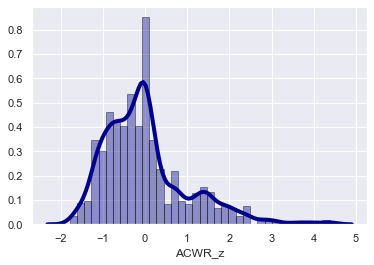

In [1537]:
#Distribution of ACWR
sns.distplot(total['ACWR'], hist=True, kde = True, 
            bins=int(180/5), color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4});

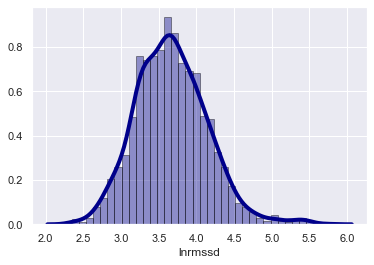

In [1532]:
sns.distplot(total['lnrmssd'], hist=True, kde = True, 
            bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [1533]:
#creating z scores for HRV and ACWR
total['lnrmssd_z'] = stats.zscore(total['lnrmssd'])

In [1534]:
total['ACWR_z'] = stats.zscore(total['ACWR'])

In [1535]:
#creating overtraining indicator
total["over_train"] = 0

In [1536]:
total

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-01       0d297d2410   4153.000000              104.000000   
                 35c7355282   5327.400000              465.000000   
                 4985083f4d   6501.800000              826.000000   
                 5d200bd1c6   7676.200000             1187.000000   
                 6be5033971   8850.600000             1548.000000   
                 a1c2e6b2eb  10025.000000             1909.000000   
                 cdfbcad405   1081.000000               21.000000   
                 ebf2c3cb63   7230.000000              160.500000   
                 fcf3ea75b0  13379.000000              300.000000   
2020-01-02       0d297d2410  18523.000000              483.000000   
                 35c7355282  16081.800000              859.800000   
                 4985083f4d  13640.600000             1236.600000   
                 5d200bd1c6  11199.400000             1613.400000   
                 6be5033971   8758.200000             1990.200000   
                 a1c2e6b2eb   6317.000000             2367.000000   
                 cdfbcad405   8641.000000              105.000000   
                 ebf2c3cb63   8675.000000              173.000000   
                 fcf3ea75b0   8709.000000              241.000000   
2020-01-03       0d297d2410   7466.000000              262.000000   
                 35c7355282   6728.800000              530.600000   
                 4985083f4d   5991.600000              799.200000   
                 5d200bd1c6   5254.400000             1067.800000   
                 6be5033971   4517.200000             1336.400000   
                 a1c2e6b2eb   3780.000000             1605.000000   
                 cdfbcad405   1730.000000               32.000000   
                 ebf2c3cb63   5112.500000              130.500000   
                 fcf3ea75b0   8495.000000              229.000000   
2020-01-04       0d297d2410   5811.000000              140.000000   
                 35c7355282   6584.750000              614.250000   
                 5d200bd1c6   7358.500000             1088.500000   
...                                   ...                     ...   
2020-05-10       fde84801d8   2141.000000             1384.000000   
                 fe6c1b1349   3996.500000             1338.750000   
2020-05-11       01bad5a519   5852.000000             1293.500000   
                 0d297d2410  10157.000000             1248.250000   
                 0f2d7af30c   5138.000000             1203.000000   
                 1942df1c47    119.000000             1237.333333   
                 1ce1d77659    136.545455             1271.666667   
                 276ab22485    154.090909             1306.000000   
                 3acfbb328e    171.636364             1340.333333   
                 42a99d8248    189.181818             1374.666667   
                 4985083f4d    206.727273             1409.000000   
                 4e1e508f56    224.272727             1443.333333   
                 6be5033971    241.818182             1477.666667   
                 71980b2daf    259.363636             1512.000000   
                 78cc008261    276.909091             1546.333333   
                 9871ee5e7b    294.454545             1580.666667   
                 a1c2e6b2eb    312.000000             1615.000000   
                 aa036185e3   6724.000000             2254.000000   
                 b523b4512b    246.000000             2060.500000   
                 c174f32d88   5619.000000             1867.000000   
                 cf7e50bcde   3975.333333             1251.000000   
                 f9edcb7056   2331.666667              635.000000   
                 fcf3ea75b0    688.000000               19.000000   
                 fde84801d8   5360.000000             1639.000000   
2020-05-12       0d297d2410   5360.000000             1316.600000   
                 78cc008261 

In [1539]:
#total['over_train'].loc

total[(total.lnrmssd_z < -.31) & (total.ACWR_z > .41)]

steps_count  active_calories_burned  \
measurement_date user_code                                          
2020-01-18       0d297d2410   7316.000000              175.000000   
2020-01-19       0d297d2410  11879.000000              272.000000   
2020-01-20       0d297d2410   4807.333333              141.333333   
2020-01-21       0d297d2410  28314.000000              797.000000   
2020-01-24       cdfbcad405   9326.000000               60.000000   
                 ebf2c3cb63   9166.000000              109.500000   
                 fcf3ea75b0   5057.000000              159.000000   
2020-01-25       0d297d2410   2347.000000              142.166667   
                 276ab22485   2392.500000              125.333333   
                 c174f32d88    576.000000             1501.000000   
                 cdfbcad405   1874.000000               39.000000   
                 ebf2c3cb63   5871.000000              239.000000   
                 fcf3ea75b0  10655.000000              439.000000   
2020-01-26       0d297d2410  30882.000000             2042.000000   
                 276ab22485  24545.500000             1554.250000   
                 c174f32d88   2961.000000             1773.000000   
2020-01-27       c174f32d88   2813.000000             1910.000000   
2020-01-28       c174f32d88   5958.000000             2095.000000   
                 cdfbcad405   1124.000000             1759.833333   
                 ebf2c3cb63   5014.000000             1424.666667   
2020-01-29       276ab22485   8787.500000              419.166667   
                 c174f32d88   6446.000000             2076.000000   
                 cdfbcad405   5655.000000             1849.333333   
2020-01-30       c174f32d88   3680.000000             1949.000000   
                 cdfbcad405   8375.000000             1625.833333   
2020-01-31       9871ee5e7b   5200.000000              878.000000   
2020-02-02       9871ee5e7b   4901.000000              888.000000   
2020-02-03       9871ee5e7b   5204.000000              195.000000   
2020-02-05       9871ee5e7b   4545.000000              962.000000   
2020-02-06       9871ee5e7b   7811.000000             1031.500000   
...                                   ...                     ...   
2020-05-04       982ec78569   8345.800000             1511.200000   
                 a1c2e6b2eb   9216.400000             1869.000000   
2020-05-05       0f2d7af30c    308.000000             1382.000000   
                 1942df1c47    343.428571             1192.571429   
                 1ce1d77659    378.857143             1003.142857   
                 1ed25f66e9    414.285714              813.714286   
                 71980b2daf   2492.000000               77.285714   
                 a1c2e6b2eb   4926.000000              409.000000   
2020-05-06       1ce1d77659    377.666667              874.000000   
                 866977681f   9500.200000             1795.333333   
                 a1c2e6b2eb  12663.600000             2241.166667   
2020-05-07       42a99d8248   1146.000000               98.000000   
                 4985083f4d   1233.750000               74.750000   
                 4c2702c3e1   1321.500000               51.500000   
                 638c757e73   1409.250000               28.250000   
                 a1c2e6b2eb   9226.500000             1205.000000   
                 b325aa1406   9436.000000             1407.500000   
2020-05-08       276ab22485   6574.714286              773.500000   
                 3acfbb328e   6196.142857              523.333333   
                 a1c2e6b2eb  11074.000000             2042.000000   
                 b523b4512b    334.000000                7.000000   
2020-05-09       a1c2e6b2eb  14309.000000             1490.000000   
2020-05-10       638c757e73  10369.500000             2468.428571   
                 9871ee5e7b   7768.333333             1919.285714   
                 a1c2e6b2eb  10135.000000             1782.000000   
2020-05-11       4e1e508f56 

In [1538]:
total.to_csv('total.csv')

In [1540]:
total2 = pd.read_csv("total2.csv")

In [1541]:
total2

,Unnamed: 0,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,...,rmssd,pnn50,bpm,lnrmssd,is_resting,heart_rate,BMI,lnrmssd_z,ACWR_z,over_train
0,1,2020-01-01,0d297d2410,4153.000000,104.000000,3060.000000,32.980000,36.370607,85.0,3.000000,...,46.418063,17.704062,77.364888,3.671046,0.012658,82.683544,28.731943,1.119657e-14,-4.219539e-15,0
1,2,2020-01-01,35c7355282,5327.400000,465.000000,3531.400000,28.352000,36.370607,73.0,3.333333,...,46.418063,17.704062,77.364888,3.671046,0.000000,71.714286,27.462695,1.119657e-14,-4.219539e-15,0
2,3,2020-01-01,4985083f4d,6501.800000,826.000000,4002.800000,23.724000,36.370607,88.0,3.666667,...,46.418063,17.704062,77.364888,3.671046,0.007519,85.225564,16.607419,1.119657e-14,-4.219539e-15,0
3,4,2020-01-01,5d200bd1c6,7676.200000,1187.000000,4474.200000,19.096000,36.370607,75.0,4.000000,...,46.418063,17.704062,77.364888,3.671046,0.006405,73.417015,20.380704,1.119657e-14,-4.219539e-15,0
4,5,2020-01-01,6be5033971,8850.600000,1548.000000,4945.600000,14.468000,36.370607,62.0,4.333333,...,46.418063,17.704062,77.364888,3.671046,0.005291,61.608466,20.075428,1.119657e-14,-4.219539e-15,0
5,6,2020-01-01,a1c2e6b2eb,10025.000000,1909.000000,5417.000000,9.840000,36.370607,65.0,4.666667,...,46.418063,17.704062,77.364888,3.671046,0.000000,67.168919,23.878033,1.119657e-14,-4.219539e-15,0
6,7,2020-01-01,cdfbcad405,1081.000000,21.000000,875.000000,24.180000,36.370607,75.0,5.000000,...,80.053000,27.270000,73.000000,4.382689,0.000000,72.000000,29.886079,1.495187e+00,-4.219539e-15,0
7,8,2020-01-01,ebf2c3cb63,7230.000000,160.500000,4928.500000,36.250000,36.370607,77.5,7.333333,...,75.619500,34.340000,68.500000,4.323993,0.004870,75.657468,22.673584,1.371863e+00,-4.219539e-15,0
8,9,2020-01-01,fcf3ea75b0,13379.000000,300.000000,8982.000000,48.320000,36.370607,80.0,9.666667,...,71.186000,41.410000,64.000000,4.265296,0.009740,79.314935,31.895355,1.248540e+00,-4.219539e-15,0
9,10,2020-01-02,0d297d2410,18523.000000,483.000000,12553.000000,57.710000,36.370607,75.0,12.000000,...,73.706000,44.328889,63.222222,4.296026,0.006579,75.164474,28.731943,1.313106e+00,-4.219539e-15,0


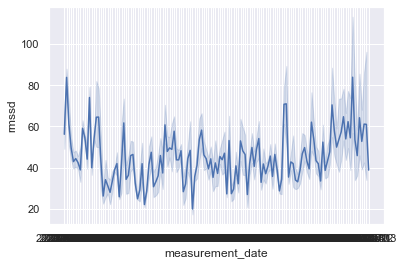

In [1543]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="measurement_date", y="rmssd",
             data=total2);

In [1545]:
total2.measurement_date = pd.to_datetime(total2.measurement_date, format = '%Y-%m-%d')

In [1551]:
total2.set_index(['measurement_date','user_code'], inplace=True) #reseting the index

In [1575]:
total2.columns

Index(['Unnamed: 0', 'steps_count', 'active_calories_burned', 'distance',
       'steps_speed', 'body_temperature_avg', 'pulse_average',
       'stand_hours_total', 'total_number_of_flights_climbed', 'pulse_min',
       'pulse_max', 'average_spo2_value', 'distance_mi', 'ACWR', 'gender',
       'age_range', 'height', 'weight', 'height_in', 'weight_lbs', 'rmssd',
       'pnn50', 'bpm', 'lnrmssd', 'is_resting', 'heart_rate', 'BMI',
       'lnrmssd_z', 'ACWR_z', 'over_train'],
      dtype='object')

In [1567]:
cols =['steps_count','active_calories_burned','steps_speed','body_temperature_avg','pulse_average',
      'stand_hours_total','height_in','weight_lbs','lnrmssd','heart_rate',
       'BMI','lnrmssd_z','ACWR_z']

In [1568]:
import statsmodels.api as sm
y = total2['over_train']

In [1569]:
X = total2[cols]

In [1570]:
logit_model=sm.Logit(y,X)

In [1571]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.128507
         Iterations 10


In [1572]:
print(result.summary2())

                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.594      
Dependent Variable:   over_train         AIC:                571.8960   
Date:                 2020-06-05 03:54   BIC:                645.4897   
No. Observations:     2124               Log-Likelihood:     -272.95    
Df Model:             12                 LL-Null:            -671.83    
Df Residuals:         2111               LLR p-value:        4.9780e-163
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
steps_count             -0.0000   0.0000 -1.6364 0.1018  -0.0001  0.0000
active_calories_burned  -0.0002   0.0002 -1.4344 0.1515  -0.0006  0.0001
steps_s

In [1574]:
total2.BMI

measurement_date  user_code 
2020-01-01        0d297d2410    28.731943
                  35c7355282    27.462695
                  4985083f4d    16.607419
                  5d200bd1c6    20.380704
                  6be5033971    20.075428
                  a1c2e6b2eb    23.878033
                  cdfbcad405    29.886079
                  ebf2c3cb63    22.673584
                  fcf3ea75b0    31.895355
2020-01-02        0d297d2410    28.731943
                  35c7355282    27.462695
                  4985083f4d    16.607419
                  5d200bd1c6    20.380704
                  6be5033971    20.075428
                  a1c2e6b2eb    23.878033
                  cdfbcad405    29.886079
                  ebf2c3cb63    22.673584
                  fcf3ea75b0    31.895355
2020-01-03        0d297d2410    28.731943
                  35c7355282    27.462695
                  4985083f4d    16.607419
                  5d200bd1c6    20.380704
                  6be5033971    20.075428
     

In [1576]:
dummies = pd.get_dummies(total2, sparse = True)

In [1577]:
dummies

Unnamed: 0   steps_count  active_calories_burned  \
measurement_date user_code                                                      
2020-01-01       0d297d2410           1   4153.000000              104.000000   
                 35c7355282           2   5327.400000              465.000000   
                 4985083f4d           3   6501.800000              826.000000   
                 5d200bd1c6           4   7676.200000             1187.000000   
                 6be5033971           5   8850.600000             1548.000000   
                 a1c2e6b2eb           6  10025.000000             1909.000000   
                 cdfbcad405           7   1081.000000               21.000000   
                 ebf2c3cb63           8   7230.000000              160.500000   
                 fcf3ea75b0           9  13379.000000              300.000000   
2020-01-02       0d297d2410          10  18523.000000              483.000000   
                 35c7355282          11  16081.800000              859.800000   
                 4985083f4d          12  13640.600000             1236.600000   
                 5d200bd1c6          13  11199.400000             1613.400000   
                 6be5033971          14   8758.200000             1990.200000   
                 a1c2e6b2eb          15   6317.000000             2367.000000   
                 cdfbcad405          16   8641.000000              105.000000   
                 ebf2c3cb63          17   8675.000000              173.000000   
                 fcf3ea75b0          18   8709.000000              241.000000   
2020-01-03       0d297d2410          19   7466.000000              262.000000   
                 35c7355282          20   6728.800000              530.600000   
                 4985083f4d          21   5991.600000              799.200000   
                 5d200bd1c6          22   5254.400000             1067.800000   
                 6be5033971          23   4517.200000             1336.400000   
                 a1c2e6b2eb          24   3780.000000             1605.000000   
                 cdfbcad405          25   1730.000000               32.000000   
                 ebf2c3cb63          26   5112.500000              130.500000   
                 fcf3ea75b0          27   8495.000000              229.000000   
2020-01-04       0d297d2410          28   5811.000000              140.000000   
                 35c7355282          29   6584.750000              614.250000   
                 5d200bd1c6          30   7358.500000             1088.500000   
...                                 ...           ...                     ...   
2020-05-10       fde84801d8        2095   2141.000000             1384.000000   
                 fe6c1b1349        2096   3996.500000             1338.750000   
2020-05-11       01bad5a519        2097   5852.000000             1293.500000   
                 0d297d2410        2098  10157.000000             1248.250000   
                 0f2d7af30c        2099   5138.000000             1203.000000   
                 1942df1c47        2100    119.000000             1237.333333   
                 1ce1d77659        2101    136.545455             1271.666667   
                 276ab22485        2102    154.090909             1306.000000   
                 3acfbb328e        2103    171.636364             1340.333333   
                 42a99d8248        2104    189.181818             1374.666667   
                 4985083f4d        2105    206.727273             1409.000000   
                 4e1e508f56        2106    224.272727             1443.333333   
                 6be5033971        2107    241.818182             1477.666667   
                 71980b2daf        2108    259.363636             1512.000000   
                 78cc008261        2109    276.909091             1546.333333   
                 9871ee5e7b        2110    294.454545             1580.666667   
                 a1c2e6b2eb        2111    312.000000       

In [1579]:
dummies.to_csv("dummies.csv")

AttributeError: 'DataFrame' object has no attribute 'user_code'